# Taller 9 - Escenas Paramétricas: Creación de Objetos desde Datos

# Inatalar librerias

In [1]:
!pip install vedo[trame] --quiet

# Instalar vedo actualizado
!pip install -U vedo --quiet


from vedo import Sphere, Cube, Cylinder, show, write, Plotter, Star, Torus
import numpy as np
import random
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 9.7 MB/s eta 0:00:00


#Generar varias escenas:

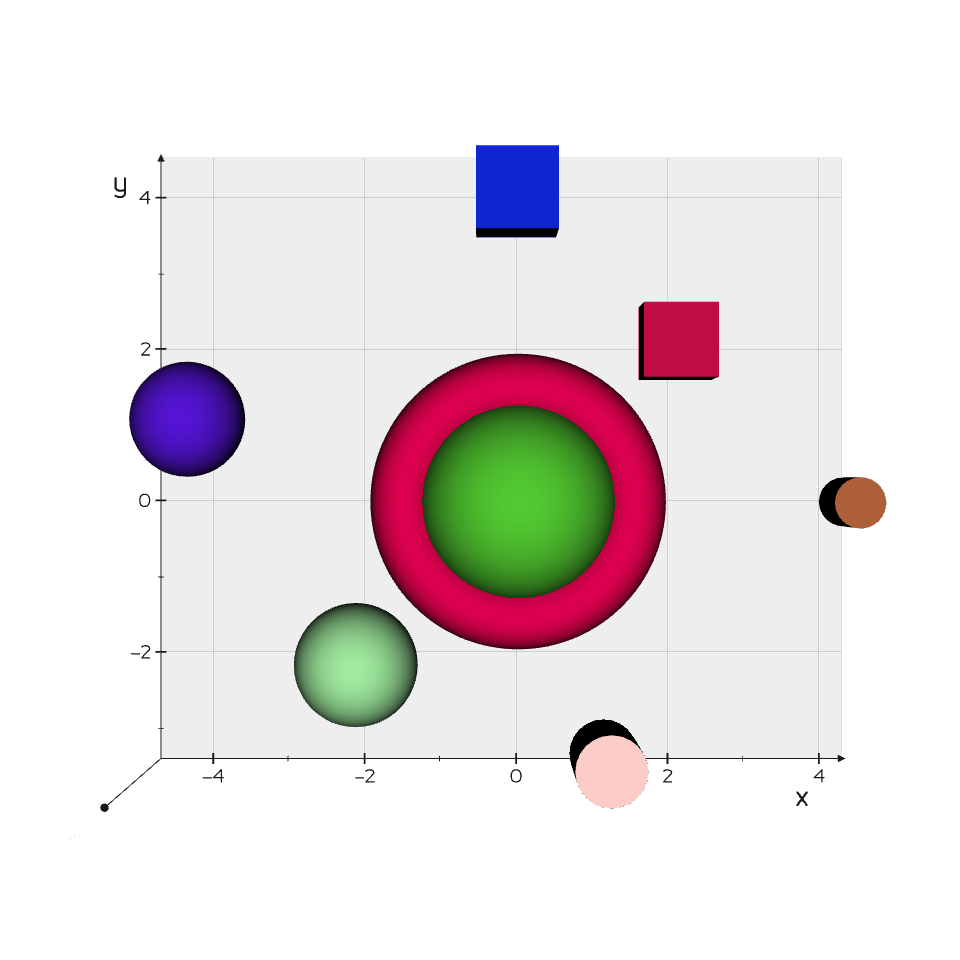

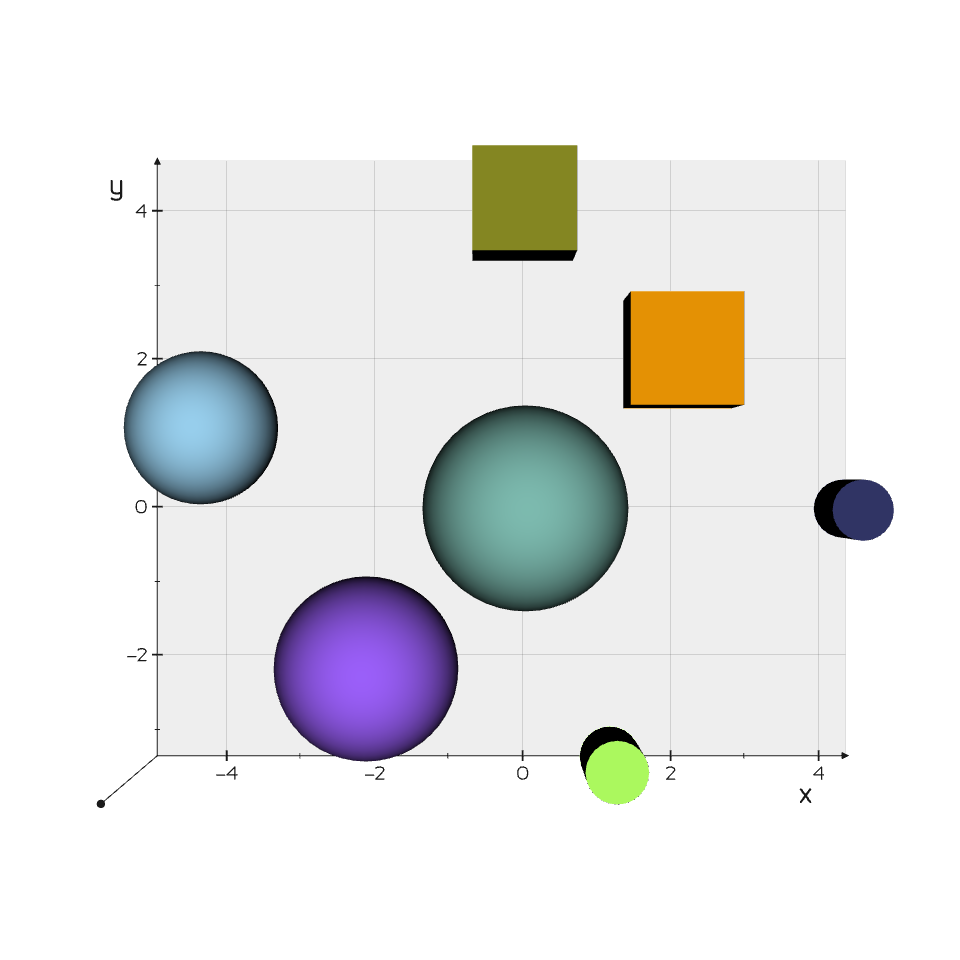

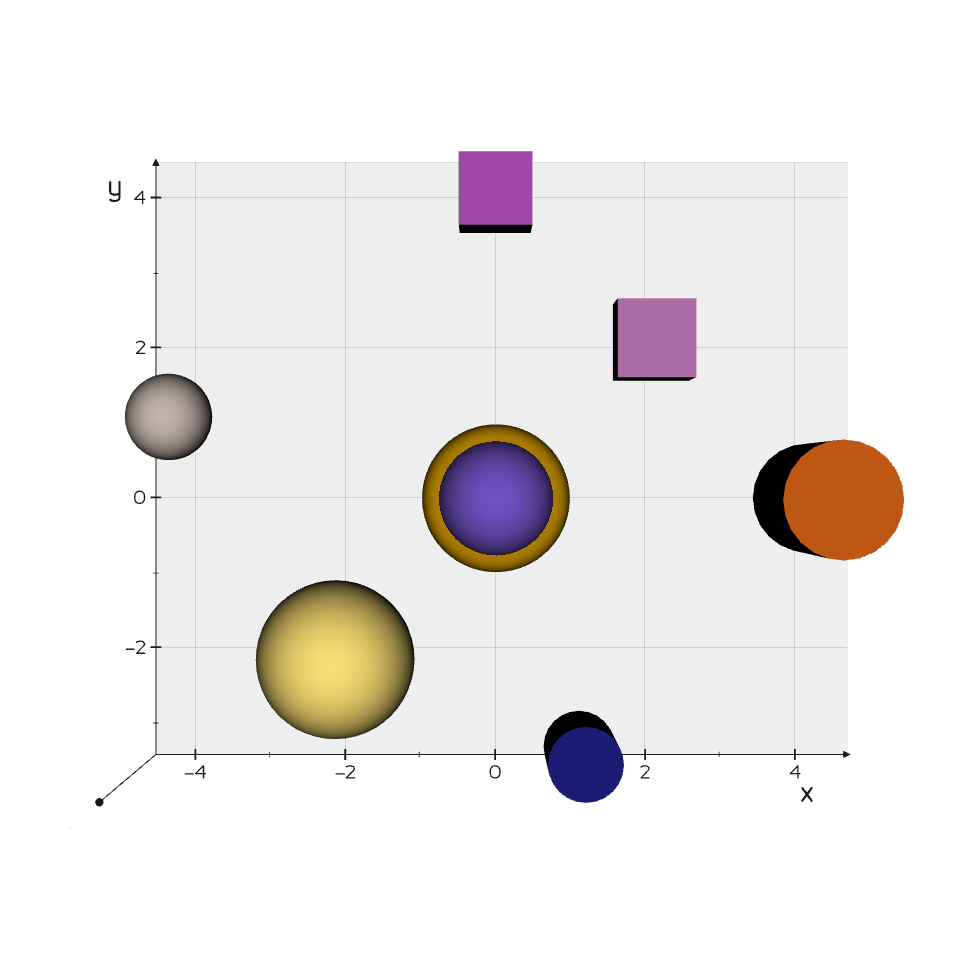

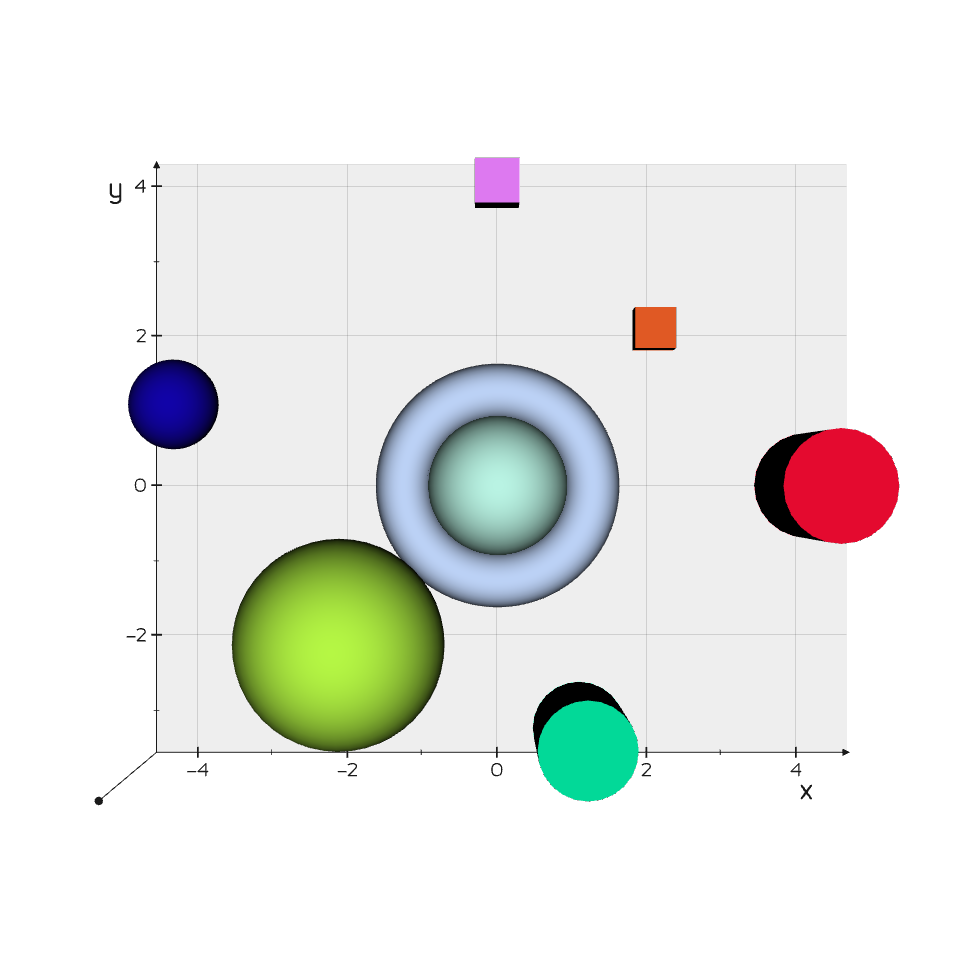

In [3]:
# Coordenadas base para ubicar objetos 3D en el espacio
points = [
    (0, 0, 0),
    (2, 2, 0),
    (4, 0, 1),
    (-2, -2, 0.5),
    (0, 4, -1),
    (1, -3, 2),
    (-4, 1, 1),
    (0, 0, 0)
]


# Número de escenas distintas que se van a generar
num_escenas = 3

# Bucle para crear múltiples escenas con los mismos puntos, pero objetos aleatorios
for escena_id in range(0, num_escenas + 1):
    objects = []  # Lista para almacenar objetos 3D de la escena actual

    # Iterar sobre cada punto y su índice
    for i, (x, y, z) in enumerate(points):
        # Definir tamaño aleatorio entre 0.5 y 1.5
        size = 0.5 + random.random()

        # Generar un color RGB aleatorio
        color = np.random.rand(3)

        # Asignar tipo de objeto según el índice
        if i == 3 or i == 6 or i == 0:
            # Esfera en puntos específicos
            obj = Sphere(pos=(x, y, z), r=size, c=color)
        elif i == 1 or i == 4:
            # Cubo en puntos específicos
            obj = Cube(pos=(x, y, z), side=size, c=color)
        elif i == 2 or i == 5:
            # Cilindro con radio y altura derivados del tamaño
            obj = Cylinder(pos=(x, y, z), r=size * 0.5, height=size * 2, c=color)
        elif i == 7:
            # Toroide como figura final
            obj = Torus(pos=(x, y, z), r1=size, r2=size * 0.3, c=color)
        else:
            obj = Star(pos=(x, y, z), c=color)

        # Agregar objeto a la escena actual
        objects.append(obj)


    # Crear el renderizador en modo offscreen
    plotter = Plotter(offscreen=True)

    # Mostrar los objetos en una vista con ejes, sin interacción y zoom personalizado
    plotter.show(objects, axes=1, interactive=False, zoom=1.2)

    # Guardar una captura de la escena como imagen PNG
    filename = f"escena_parametrica_{escena_id}.png"
    plotter.screenshot(filename)
    # Cerrar el plotter
    plotter.close()

    # Mostrar la imagen
    display(Image(filename))


# Exportar imagenes:

In [3]:
from google.colab import files

num_escenas = 3
for i in range(1, num_escenas + 1):
    filename = f"escena_parametrica_{i}.png"
    files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exportar como objetos  .OBJ, .STL o .GLTF

In [4]:
!pip install trimesh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 15.0 MB/s eta 0:00:00


In [8]:
import trimesh
import numpy as np

# Convertir un objeto Vedo (por ejemplo, el primero) a Trimesh
faces_data = objects[0].cells
faces_array = np.asarray(faces_data, dtype=np.int64)
mesh_trimesh = trimesh.Trimesh(vertices=objects[0].points, faces=faces_array)

# Exportar a diferentes formatos
with open("objeto_trimesh_pythonOBJ.obj", "w") as f:
    f.write(trimesh.exchange.obj.export_obj(mesh_trimesh))

with open("objeto_trimesh_pythonstl.stl", "wb") as f:
    f.write(trimesh.exchange.stl.export_stl(mesh_trimesh))

with open("objeto_trimesh_pythonGLB.glb", "wb") as f:
    f.write(trimesh.exchange.gltf.export_glb(mesh_trimesh))

In [9]:
from google.colab import files

# Descargar archivo OBJ
files.download("objeto_trimesh_pythonOBJ.obj")

# Descargar archivo STL
files.download("objeto_trimesh_pythonstl.stl")

# Descargar archivo GLB
files.download("objeto_trimesh_pythonGLB.glb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>